<a href="https://colab.research.google.com/github/Nolram23/challenge2_telecomX_alura_latam_solucionado_marlon__miranda_2025/blob/main/TelecomX_parte_2_LATAM_solucion_marlon_miranda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import pandas as pd


In [199]:
df = pd.read_csv('/content/datos_tratados (1).csv')

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [201]:
json_data = df.to_json(orient='records')
print(json_data)

[{"customerID":"0002-orfbo","Churn":"no","gender":"female","SeniorCitizen":0,"Partner":"yes","Dependents":"yes","tenure":9,"PhoneService":"yes","MultipleLines":"no","InternetService":"dsl","OnlineSecurity":"no","OnlineBackup":"yes","DeviceProtection":"no","TechSupport":"yes","StreamingTV":"yes","StreamingMovies":"no","Contract":"one year","PaperlessBilling":"yes","PaymentMethod":"mailed check","Charges.Monthly":65.6,"Charges.Total":593.3,"Cuentas_Diarias":2.1866666667,"SeniorCitizen_str":"No","tenure_group":"0-12","Churn_num":0},{"customerID":"0003-mknfe","Churn":"no","gender":"male","SeniorCitizen":0,"Partner":"no","Dependents":"no","tenure":9,"PhoneService":"yes","MultipleLines":"yes","InternetService":"dsl","OnlineSecurity":"no","OnlineBackup":"no","DeviceProtection":"no","TechSupport":"no","StreamingTV":"no","StreamingMovies":"yes","Contract":"month-to-month","PaperlessBilling":"no","PaymentMethod":"mailed check","Charges.Monthly":59.9,"Charges.Total":542.4,"Cuentas_Diarias":1.9966

In [202]:
with open('datos_tratados.json', 'w') as f:
    f.write(json_data)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7032 non-null   object 
 1   Churn              7032 non-null   object 
 2   gender             7032 non-null   object 
 3   SeniorCitizen      7032 non-null   int64  
 4   Partner            7032 non-null   object 
 5   Dependents         7032 non-null   object 
 6   tenure             7032 non-null   int64  
 7   PhoneService       7032 non-null   object 
 8   MultipleLines      7032 non-null   object 
 9   InternetService    7032 non-null   object 
 10  OnlineSecurity     7032 non-null   object 
 11  OnlineBackup       7032 non-null   object 
 12  DeviceProtection   7032 non-null   object 
 13  TechSupport        7032 non-null   object 
 14  StreamingTV        7032 non-null   object 
 15  StreamingMovies    7032 non-null   object 
 16  Contract           7032 

In [204]:
df = df.drop(columns=['SeniorCitizen_str', 'tenure_group', 'Churn_num', 'Cuentas_Diarias'], axis=1)


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [206]:
df.nunique().sort_values(ascending=True)

Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
PhoneService           2
Dependents             2
PaperlessBilling       2
InternetService        3
DeviceProtection       3
TechSupport            3
OnlineSecurity         3
OnlineBackup           3
StreamingTV            3
StreamingMovies        3
Contract               3
MultipleLines          3
PaymentMethod          4
tenure                72
Charges.Monthly     1584
Charges.Total       6530
customerID          7032
dtype: int64

In [207]:
df.nunique()[df.nunique() == 1]

Series([], dtype: int64)

In [208]:
df.T.drop_duplicates().T.shape

(7032, 21)

In [209]:
df = df.drop(columns=['customerID'])

In [210]:
df

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       no  female              0     yes        yes       9          yes   
1       no    male              0      no         no       9          yes   
2      yes    male              0      no         no       4          yes   
3      yes    male              1     yes         no      13          yes   
4      yes  female              1     yes         no       3          yes   
...    ...     ...            ...     ...        ...     ...          ...   
7027    no  female              0      no         no      13          yes   
7028   yes    male              0     yes         no      22          yes   
7029    no    male              0      no         no       2          yes   
7030    no    male              0     yes        yes      67          yes   
7031    no    male              0     yes        yes      63           no   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0                   no             dsl             no          yes   
1                  yes             dsl             no           no   
2                   no     fiber optic             no           no   
3                   no     fiber optic             no          yes   
4                   no     fiber optic             no           no   
...                ...             ...            ...          ...   
7027                no             dsl            yes           no   
7028               yes     fiber optic             no           no   
7029                no             dsl             no          yes   
7030                no             dsl            yes           no   
7031  no phone service             dsl            yes          yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  no         yes         yes              no        one year   
1                  no          no          no             yes  month-to-month   
2                 yes          no          no              no  month-to-month   
3                 yes          no         yes             yes  month-to-month   
4                  no         yes         yes              no  month-to-month   
...               ...         ...         ...             ...             ...   
7027               no         yes          no              no        one year   
7028               no          no          no             yes  month-to-month   
7029               no          no          no              no  month-to-month   
7030              yes         yes          no             yes        two year   
7031              yes          no         yes             yes        two year   

     PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  
0                 yes      mailed check            65.60         593.30  
1                  no      mailed check            59.90         542.40  
2                 yes  electronic check            73.90         280.85  
3                 yes  electronic check            98.00        1237.85  
4                 yes      mailed check            83.90         267.40  
...               ...               ...              ...            ...  
7027               no      mailed check            55.15         742.90  
7028              yes  electronic check            85.10        1873.70  
7029              yes      mailed check            50.30          92.75  
7030               no      mailed check            67.85        4627.65  
7031               no  electronic check            59.00        3707.60  

[7032 rows x 20 columns]

In [211]:
# Convertir variable Churn a numérica (Yes=1, No=0)
df['Churn_num'] = df['Churn'].map({'yes': 1, 'no': 0})

# Verificar
df[['Churn', 'Churn_num']].head(10)

Churn  Churn_num
0    no          0
1    no          0
2   yes          1
3   yes          1
4   yes          1
5    no          0
6    no          0
7    no          0
8    no          0
9    no          0

In [212]:
df['Churn'] = df['Churn_num'].astype(int)

In [213]:
datos= df.copy()


In [214]:
df.sample(5)

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
6715      0    male              0     yes         no       8          yes   
5537      0    male              1      no         no      31          yes   
4464      1  female              0      no         no      29          yes   
6229      0  female              0     yes        yes      70           no   
207       1    male              0      no         no       1          yes   

         MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
6715                no     fiber optic            yes  ...               no   
5537               yes     fiber optic             no  ...              yes   
4464                no     fiber optic             no  ...               no   
6229  no phone service             dsl             no  ...              yes   
207                 no             dsl            yes  ...               no   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
6715          no          no              no  month-to-month              yes   
5537         yes         yes              no  month-to-month              yes   
4464          no         yes              no  month-to-month              yes   
6229         yes         yes             yes        one year              yes   
207           no          no              no  month-to-month              yes   

                  PaymentMethod Charges.Monthly  Charges.Total  Churn_num  
6715               mailed check           75.00         658.10          0  
5537  bank transfer (automatic)           96.60        2877.95          0  
4464           electronic check           78.90        2384.15          1  
6229  bank transfer (automatic)           58.40        4113.15          0  
207                mailed check           48.55          48.55          1  

[5 rows x 21 columns]

In [215]:
datos.sample(5)

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
5520      0    male              0      no         no       6          yes   
6732      1    male              0     yes        yes      30          yes   
4036      0  female              0     yes         no      26           no   
3080      0  female              0      no         no      20          yes   
4561      0    male              0      no        yes      30          yes   

         MultipleLines InternetService       OnlineSecurity  ...  \
5520                no              no  no internet service  ...   
6732               yes     fiber optic                  yes  ...   
4036  no phone service             dsl                  yes  ...   
3080                no              no  no internet service  ...   
4561                no             dsl                   no  ...   

         DeviceProtection          TechSupport          StreamingTV  \
5520  no internet service  no internet service  no internet service   
6732                   no                   no                  yes   
4036                  yes                   no                   no   
3080  no internet service  no internet service  no internet service   
4561                  yes                   no                  yes   

          StreamingMovies        Contract PaperlessBilling  \
5520  no internet service  month-to-month               no   
6732                   no  month-to-month              yes   
4036                   no        one year               no   
3080  no internet service        one year              yes   
4561                   no        one year               no   

                  PaymentMethod Charges.Monthly  Charges.Total  Churn_num  
5520  bank transfer (automatic)           20.15         130.50          0  
6732           electronic check           94.40        2838.70          1  
4036    credit card (automatic)           35.40         978.60          0  
3080    credit card (automatic)           19.35         433.75          0  
4561    credit card (automatic)           64.50        1929.95          0  

[5 rows x 21 columns]

In [216]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [217]:
df = df.drop(columns=['Churn_num'])

In [218]:
json_data = df.to_json(orient='records')
with open('datos_tratados.json', 'w') as f:
    f.write(json_data)

In [219]:

numericas = df.drop(columns=['Churn']).select_dtypes(include='number')
numericas.columns

Index(['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total'], dtype='object')

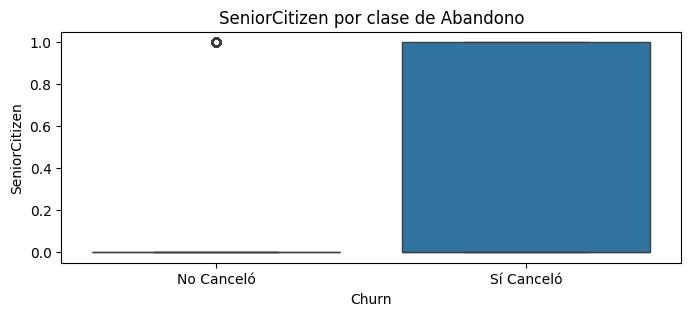

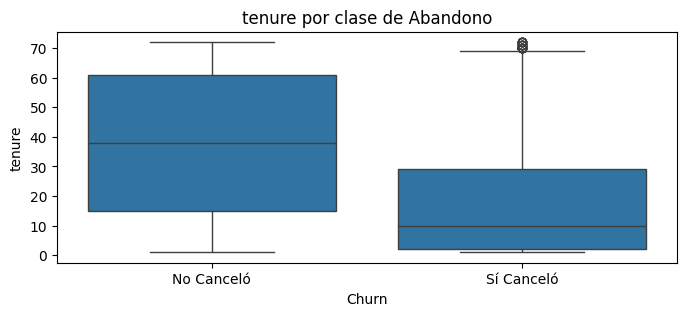

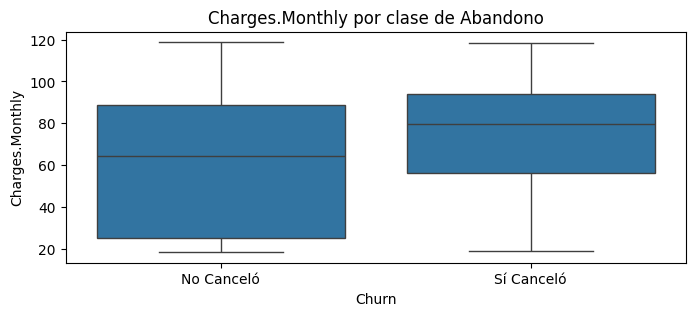

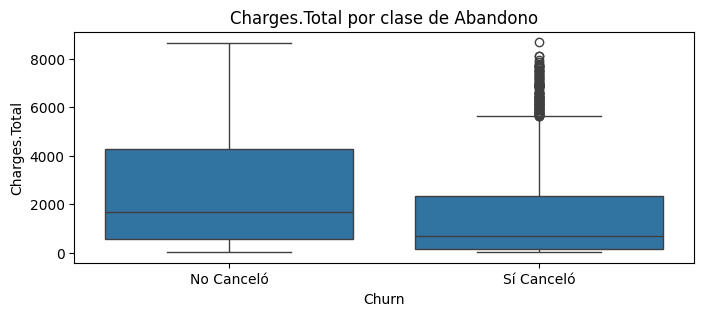

In [220]:
for col in numericas:
    plt.figure(figsize=(8, 3))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} por clase de Abandono')
    plt.xticks([0, 1], ['No Canceló', 'Sí Canceló'])
    plt.show()

In [221]:
categoricas = datos.select_dtypes(include='object')
categoricas.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [222]:
categoricas

gender Partner Dependents PhoneService     MultipleLines  \
0     female     yes        yes          yes                no   
1       male      no         no          yes               yes   
2       male      no         no          yes                no   
3       male     yes         no          yes                no   
4     female     yes         no          yes                no   
...      ...     ...        ...          ...               ...   
7027  female      no         no          yes                no   
7028    male     yes         no          yes               yes   
7029    male      no         no          yes                no   
7030    male     yes        yes          yes                no   
7031    male     yes        yes           no  no phone service   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                dsl             no          yes               no         yes   
1                dsl             no           no               no          no   
2        fiber optic             no           no              yes          no   
3        fiber optic             no          yes              yes          no   
4        fiber optic             no           no               no         yes   
...              ...            ...          ...              ...         ...   
7027             dsl            yes           no               no         yes   
7028     fiber optic             no           no               no          no   
7029             dsl             no          yes               no          no   
7030             dsl            yes           no              yes         yes   
7031             dsl            yes          yes              yes          no   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0            yes              no        one year              yes   
1             no             yes  month-to-month               no   
2             no              no  month-to-month              yes   
3            yes             yes  month-to-month              yes   
4            yes              no  month-to-month              yes   
...          ...             ...             ...              ...   
7027          no              no        one year               no   
7028          no             yes  month-to-month              yes   
7029          no              no  month-to-month              yes   
7030          no             yes        two year               no   
7031         yes             yes        two year               no   

         PaymentMethod  
0         mailed check  
1         mailed check  
2     electronic check  
3     electronic check  
4         mailed check  
...                ...  
7027      mailed check  
7028  electronic check  
7029      mailed check  
7030      mailed check  
7031  electronic check  

[7032 rows x 15 columns]

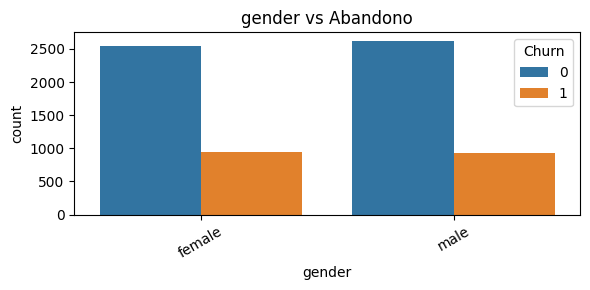

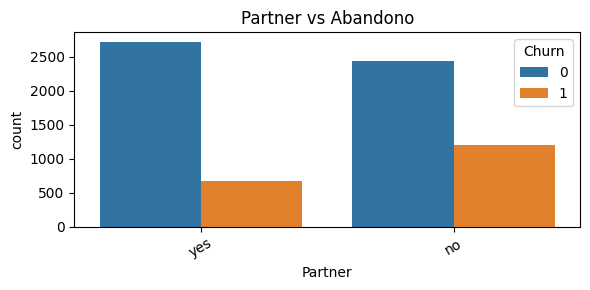

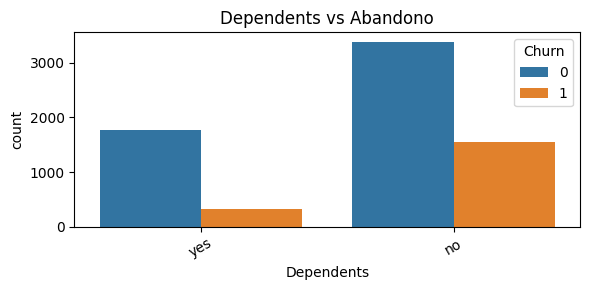

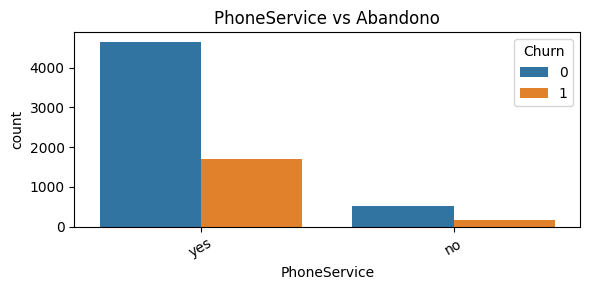

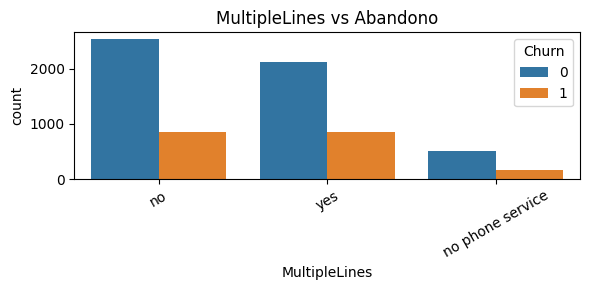

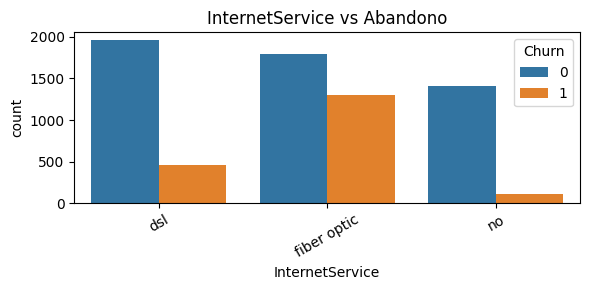

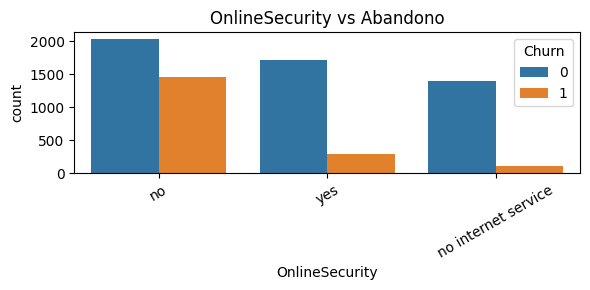

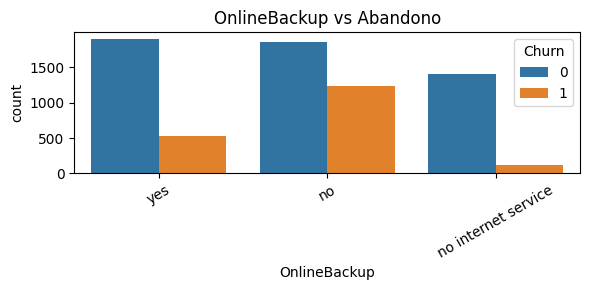

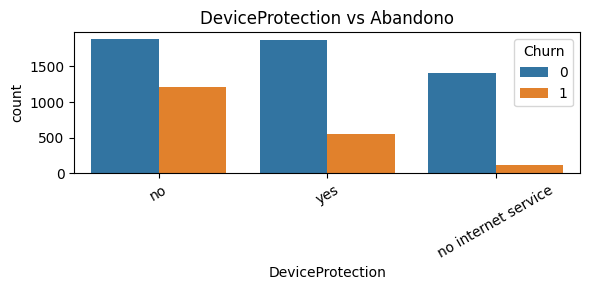

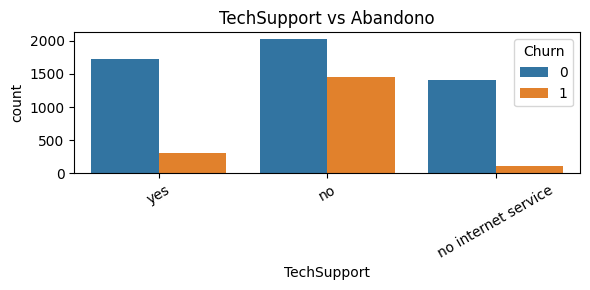

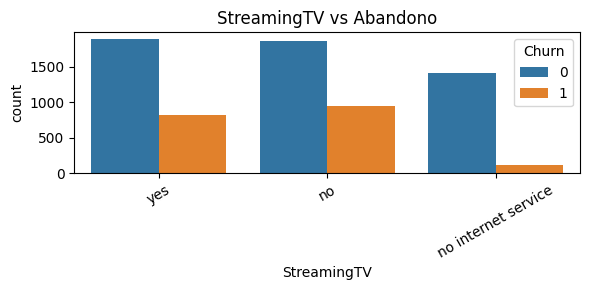

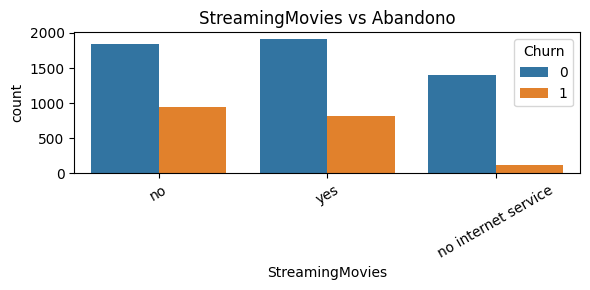

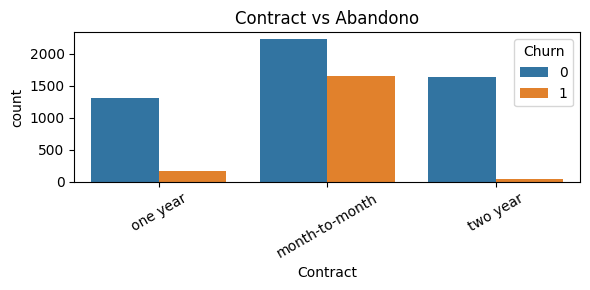

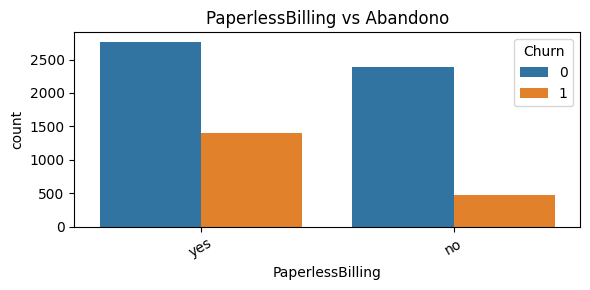

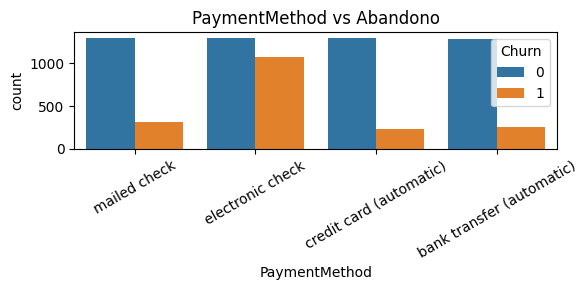

In [223]:
for col in categoricas:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Abandono')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

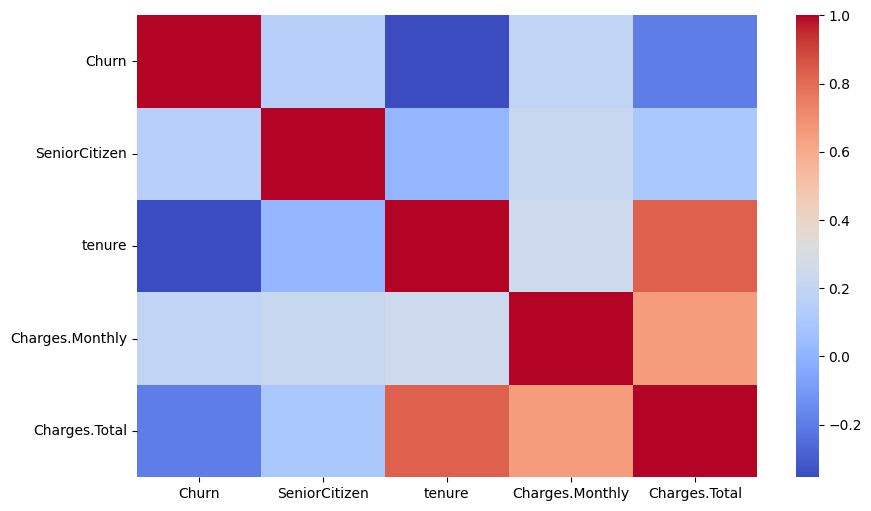

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.show()

/tmp/ipython-input-2257563243.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="tenure", palette="Set2")


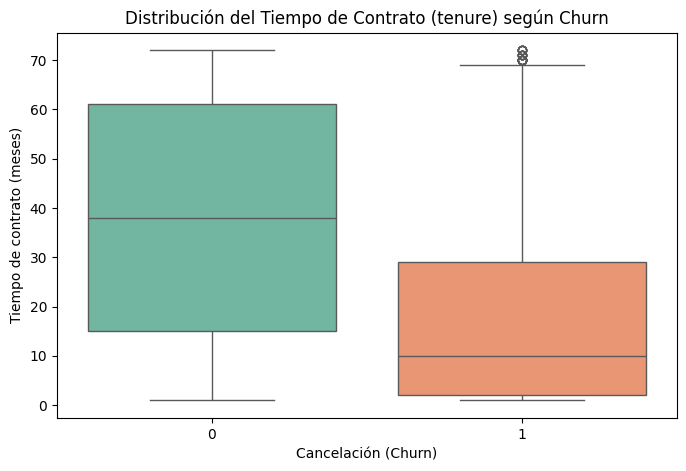

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="tenure", palette="Set2")
plt.title("Distribución del Tiempo de Contrato (tenure) según Churn")
plt.xlabel("Cancelación (Churn)")
plt.ylabel("Tiempo de contrato (meses)")
plt.show()

/tmp/ipython-input-3604857438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="Charges.Total", palette="coolwarm")


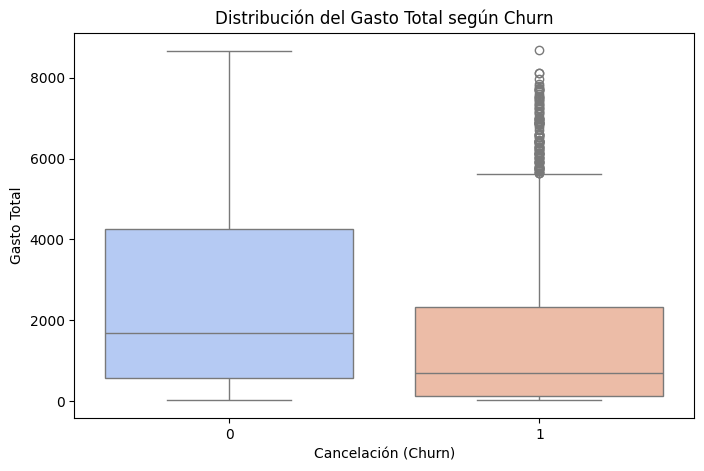

In [309]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="Charges.Total", palette="coolwarm")
plt.title("Distribución del Gasto Total según Churn")
plt.xlabel("Cancelación (Churn)")
plt.ylabel("Gasto Total")
plt.show()

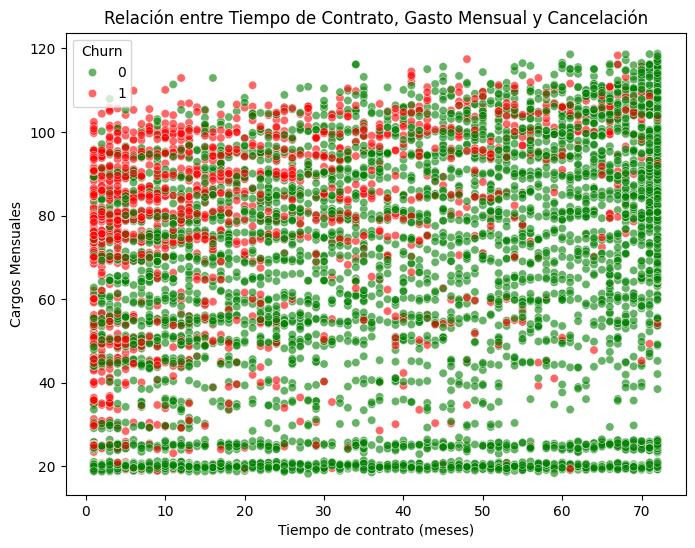

In [314]:
from seaborn import scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=datos,
    x="tenure", y="Charges.Monthly",
    hue="Churn", alpha=0.6,
    palette={0: "green", 1: "red"}
)
plt.title("Relación entre Tiempo de Contrato, Gasto Mensual y Cancelación")
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Cargos Mensuales")
plt.show()

In [225]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder


In [226]:
datos = datos.drop(columns=['Churn_num'])

In [227]:
x = datos.drop(columns='Churn')
y = datos['Churn']

In [228]:
categoricas = x.select_dtypes(include=['object']).columns.tolist()
categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [229]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary', handle_unknown='ignore'), categoricas),
    remainder='passthrough',
    sparse_threshold=0  # devuelve matriz densa
)



In [230]:
one_hot_linear = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'), categoricas),
    remainder='passthrough',
    sparse_threshold=0  # devuelve matriz densa
)

In [231]:
labelEncoder = LabelEncoder()

In [232]:
X = one_hot.fit_transform(x)

In [233]:
Y = labelEncoder.fit_transform(y)


In [234]:
X_linear = one_hot_linear.fit_transform(x)

In [235]:
X_linear

array([[0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 9.00000e+00,
        6.56000e+01, 5.93300e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.00000e+00,
        5.99000e+01, 5.42400e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 4.00000e+00,
        7.39000e+01, 2.80850e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        5.03000e+01, 9.27500e+01],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 6.70000e+01,
        6.78500e+01, 4.62765e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 6.30000e+01,
        5.90000e+01, 3.70760e+03]])

In [236]:
Y_linear = labelEncoder.fit_transform(y)

In [237]:
columnas = one_hot.get_feature_names_out()

columnas_encoded = []
for columna in columnas:
    columna = columna.split('__')[1]
    columnas_encoded.append(columna)

In [238]:
columnas_linear = one_hot_linear.get_feature_names_out()

columnas_encoded_linear = []
for columna in columnas_linear:
    columna = columna.split('__')[1]
    columnas_encoded_linear.append(columna)

In [239]:
len(columnas_encoded_linear)


30

In [240]:
len(columnas_encoded)

40

In [241]:
df = pd.DataFrame(X, columns=columnas_encoded)
df_y = pd.DataFrame(y, columns=['Churn'])
df = pd.concat([df, df_y], axis=1)
df.head()

gender_male  Partner_yes  Dependents_yes  PhoneService_yes  \
0          0.0          1.0             1.0               1.0   
1          1.0          0.0             0.0               1.0   
2          1.0          0.0             0.0               1.0   
3          1.0          1.0             0.0               1.0   
4          0.0          1.0             0.0               1.0   

   MultipleLines_no  MultipleLines_no phone service  MultipleLines_yes  \
0               1.0                             0.0                0.0   
1               0.0                             0.0                1.0   
2               1.0                             0.0                0.0   
3               1.0                             0.0                0.0   
4               1.0                             0.0                0.0   

   InternetService_dsl  InternetService_fiber optic  InternetService_no  ...  \
0                  1.0                          0.0                 0.0  ...   
1                  1.0                          0.0                 0.0  ...   
2                  0.0                          1.0                 0.0  ...   
3                  0.0                          1.0                 0.0  ...   
4                  0.0                          1.0                 0.0  ...   

   PaperlessBilling_yes  PaymentMethod_bank transfer (automatic)  \
0                   1.0                                      0.0   
1                   0.0                                      0.0   
2                   1.0                                      0.0   
3                   1.0                                      0.0   
4                   1.0                                      0.0   

   PaymentMethod_credit card (automatic)  PaymentMethod_electronic check  \
0                                    0.0                             0.0   
1                                    0.0                             0.0   
2                                    0.0                             1.0   
3                                    0.0                             1.0   
4                                    0.0                             0.0   

   PaymentMethod_mailed check  SeniorCitizen  tenure  Charges.Monthly  \
0                         1.0            0.0     9.0             65.6   
1                         1.0            0.0     9.0             59.9   
2                         0.0            0.0     4.0             73.9   
3                         0.0            1.0    13.0             98.0   
4                         1.0            1.0     3.0             83.9   

   Charges.Total  Churn  
0         593.30      0  
1         542.40      0  
2         280.85      1  
3        1237.85      1  
4         267.40      1  

[5 rows x 41 columns]

In [242]:
df_linear = pd.DataFrame(X_linear, columns=columnas_encoded_linear)
df_y_linear = pd.DataFrame(Y_linear, columns=['Churn'])
df_linear = pd.concat([df_linear, df_y_linear], axis=1)
df_linear.head()

gender_male  Partner_yes  Dependents_yes  PhoneService_yes  \
0          0.0          1.0             1.0               1.0   
1          1.0          0.0             0.0               1.0   
2          1.0          0.0             0.0               1.0   
3          1.0          1.0             0.0               1.0   
4          0.0          1.0             0.0               1.0   

   MultipleLines_no phone service  MultipleLines_yes  \
0                             0.0                0.0   
1                             0.0                1.0   
2                             0.0                0.0   
3                             0.0                0.0   
4                             0.0                0.0   

   InternetService_fiber optic  InternetService_no  \
0                          0.0                 0.0   
1                          0.0                 0.0   
2                          1.0                 0.0   
3                          1.0                 0.0   
4                          1.0                 0.0   

   OnlineSecurity_no internet service  OnlineSecurity_yes  ...  \
0                                 0.0                 0.0  ...   
1                                 0.0                 0.0  ...   
2                                 0.0                 0.0  ...   
3                                 0.0                 0.0  ...   
4                                 0.0                 0.0  ...   

   Contract_two year  PaperlessBilling_yes  \
0                0.0                   1.0   
1                0.0                   0.0   
2                0.0                   1.0   
3                0.0                   1.0   
4                0.0                   1.0   

   PaymentMethod_credit card (automatic)  PaymentMethod_electronic check  \
0                                    0.0                             0.0   
1                                    0.0                             0.0   
2                                    0.0                             1.0   
3                                    0.0                             1.0   
4                                    0.0                             0.0   

   PaymentMethod_mailed check  SeniorCitizen  tenure  Charges.Monthly  \
0                         1.0            0.0     9.0             65.6   
1                         1.0            0.0     9.0             59.9   
2                         0.0            0.0     4.0             73.9   
3                         0.0            1.0    13.0             98.0   
4                         1.0            1.0     3.0             83.9   

   Charges.Total  Churn  
0         593.30      0  
1         542.40      0  
2         280.85      1  
3        1237.85      1  
4         267.40      1  

[5 rows x 31 columns]

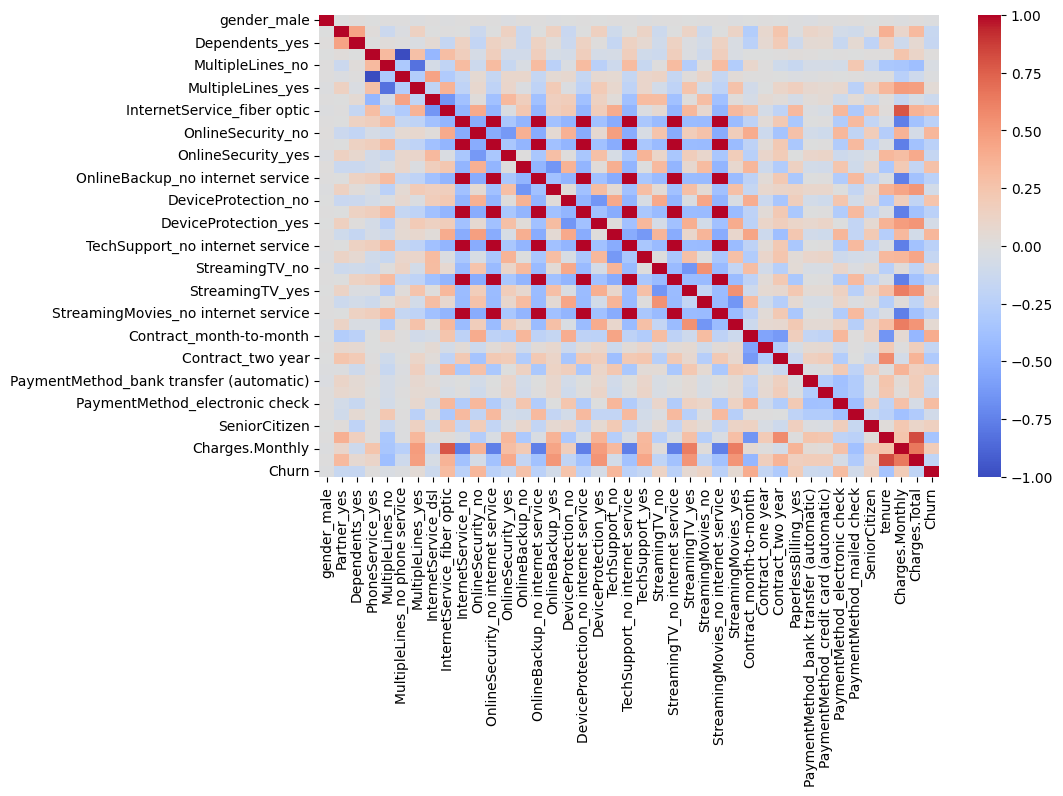

In [257]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.show()

In [243]:
df.corr().round(4)

gender_male  Partner_yes  \
gender_male                                   1.0000      -0.0014   
Partner_yes                                  -0.0014       1.0000   
Dependents_yes                                0.0103       0.4523   
PhoneService_yes                             -0.0075       0.0184   
MultipleLines_no                              0.0043      -0.1300   
MultipleLines_no phone service                0.0075      -0.0184   
MultipleLines_yes                            -0.0089       0.1426   
InternetService_dsl                           0.0076      -0.0010   
InternetService_fiber optic                  -0.0112       0.0012   
InternetService_no                            0.0047      -0.0003   
OnlineSecurity_no                             0.0109      -0.1294   
OnlineSecurity_no internet service            0.0047      -0.0003   
OnlineSecurity_yes                           -0.0163       0.1433   
OnlineBackup_no                               0.0086      -0.1356   
OnlineBackup_no internet service              0.0047      -0.0003   
OnlineBackup_yes                             -0.0131       0.1418   
DeviceProtection_no                          -0.0032      -0.1467   
DeviceProtection_no internet service          0.0047      -0.0003   
DeviceProtection_yes                         -0.0008       0.1536   
TechSupport_no                                0.0038      -0.1089   
TechSupport_no internet service               0.0047      -0.0003   
TechSupport_yes                              -0.0085       0.1202   
StreamingTV_no                                0.0031      -0.1234   
StreamingTV_no internet service               0.0047      -0.0003   
StreamingTV_yes                              -0.0071       0.1245   
StreamingMovies_no                            0.0061      -0.1175   
StreamingMovies_no internet service           0.0047      -0.0003   
StreamingMovies_yes                          -0.0101       0.1181   
Contract_month-to-month                      -0.0033      -0.2802   
Contract_one year                             0.0078       0.0831   
Contract_two year                            -0.0036       0.2473   
PaperlessBilling_yes                         -0.0119      -0.0140   
PaymentMethod_bank transfer (automatic)      -0.0160       0.1114   
PaymentMethod_credit card (automatic)         0.0016       0.0823   
PaymentMethod_electronic check                0.0008      -0.0832   
PaymentMethod_mailed check                    0.0132      -0.0969   
SeniorCitizen                                -0.0018       0.0170   
tenure                                        0.0053       0.3819   
Charges.Monthly                              -0.0138       0.0978   
Charges.Total                                 0.0000       0.3191   
Churn                                        -0.0085      -0.1500   

                                         Dependents_yes  PhoneService_yes  \
gender_male                                      0.0103           -0.0075   
Partner_yes                                      0.4523            0.0184   
Dependents_yes                                   1.0000           -0.0011   
PhoneService_yes                                -0.0011            1.0000   
MultipleLines_no                                 0.0234            0.3152   
MultipleLines_no phone service                   0.0011           -1.0000   
MultipleLines_yes                               -0.0243            0.2795   
InternetService_dsl                              0.0516           -0.4523   
InternetService_fiber optic                     -0.1641            0.2902   
InternetService_no                               0.1384            0.1718   
OnlineSecurity_no                               -0.1870           -0.0585   
OnlineSecurity_no internet service               0.1384            0.1718   
OnlineSecurity_yes                               0.0808           -0.0917   
OnlineBackup_no                                 -0.1374         

In [259]:

correlation = df.corr()['Churn'].sort_values(ascending=False)
print(correlation)

Churn                                      1.000000
Contract_month-to-month                    0.404565
OnlineSecurity_no                          0.342235
TechSupport_no                             0.336877
InternetService_fiber optic                0.307463
PaymentMethod_electronic check             0.301455
OnlineBackup_no                            0.267595
DeviceProtection_no                        0.252056
Charges.Monthly                            0.192858
PaperlessBilling_yes                       0.191454
SeniorCitizen                              0.150541
StreamingMovies_no                         0.130920
StreamingTV_no                             0.128435
StreamingTV_yes                            0.063254
StreamingMovies_yes                        0.060860
MultipleLines_yes                          0.040033
PhoneService_yes                           0.011691
gender_male                               -0.008545
MultipleLines_no phone service            -0.011691
MultipleLine

In [260]:

correlation = df_linear.corr()['Churn'].sort_values(ascending=False)
print(correlation)

Churn                                    1.000000
InternetService_fiber optic              0.307463
PaymentMethod_electronic check           0.301455
Charges.Monthly                          0.192858
PaperlessBilling_yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_yes                          0.063254
StreamingMovies_yes                      0.060860
MultipleLines_yes                        0.040033
PhoneService_yes                         0.011691
gender_male                             -0.008545
MultipleLines_no phone service          -0.011691
DeviceProtection_yes                    -0.066193
OnlineBackup_yes                        -0.082307
PaymentMethod_mailed check              -0.090773
PaymentMethod_credit card (automatic)   -0.134687
Partner_yes                             -0.149982
Dependents_yes                          -0.163128
TechSupport_yes                         -0.164716
OnlineSecurity_yes                      -0.171270


In [266]:
cols_drop_rf = [
    # Dummies redundantes de "no internet service"
    'StreamingTV_no internet service',
    'StreamingMovies_no internet service',
    'TechSupport_no internet service',
    'DeviceProtection_no internet service',
    'OnlineBackup_no internet service',
    'OnlineSecurity_no internet service',
    # Redundante con tenure y MonthlyCharges
    'Charges.Total'
]

In [262]:
cols_drop_knn = [
    # Todas las dummies "no internet service"
    'StreamingTV_no internet service',
    'StreamingMovies_no internet service',
    'TechSupport_no internet service',
    'DeviceProtection_no internet service',
    'OnlineBackup_no internet service',
    'OnlineSecurity_no internet service',
    'InternetService_no',
    # Redundantes
    'Charges.Total',
    'StreamingTV_yes',
    'StreamingMovies_yes',
    # Poco informativas
    'PhoneService_yes',
    'gender_male'
]

In [267]:
X_rf = df_linear.drop(columns=cols_drop_rf, errors='ignore')


In [268]:
X_knn = df.drop(columns=cols_drop_knn, errors='ignore')

In [269]:
X = df.drop(columns='Churn')
y = df['Churn']

In [270]:
X_linear = df_linear.drop(columns='Churn')
y_linear = df_linear['Churn']

Churn
0    5163
1    1869
Name: count, dtype: int64
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


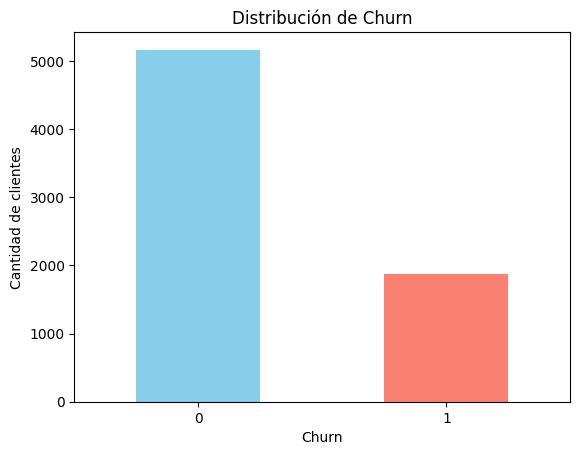

In [271]:
import matplotlib.pyplot as plt

# Conteo absoluto
print(y.value_counts())

# Proporciones
print(y.value_counts(normalize=True))

# Visualización
y.value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Distribución de Churn")
plt.xticks(rotation=0)
plt.ylabel("Cantidad de clientes")
plt.show()

In [272]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [280]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

In [284]:
from sklearn.metrics import classification_report, roc_auc_score

print("RandomForest Results")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

RandomForest Results
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110

ROC-AUC: 0.8226369954050051


In [285]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, class_weight="balanced")

param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True]  # mantener True si piensas usar oob_score más adelante
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,               # StratifiedKFold implícito para clasificación
    n_jobs=-1,
    refit=True,         # reentrena con los mejores hiperparámetros
    verbose=1
)

grid.fit(X_train, y_train)
print("Mejores parámetros:", grid.best_params_)
print("Mejor AUC (CV):", grid.best_score_)
best_rf = grid.best_estimator_



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 400}
Mejor AUC (CV): 0.84486181021955


In [286]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print("AUC test:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred, digits=3))

AUC test: 0.8450181762945216
              precision    recall  f1-score   support

           0      0.893     0.768     0.826      1549
           1      0.538     0.747     0.625       561

    accuracy                          0.762      2110
   macro avg      0.716     0.757     0.726      2110
weighted avg      0.799     0.762     0.772      2110



In [287]:
import pandas as pd

imp = pd.Series(best_rf.feature_importances_, index=X.columns)\
       .sort_values(ascending=False)
imp.head(15)

tenure                            0.129906
Contract_month-to-month           0.126758
Charges.Total                     0.106950
Charges.Monthly                   0.074316
Contract_two year                 0.059616
TechSupport_no                    0.052445
OnlineSecurity_no                 0.048725
InternetService_fiber optic       0.044965
PaymentMethod_electronic check    0.037211
OnlineBackup_no                   0.022538
Contract_one year                 0.021315
InternetService_dsl               0.020292
TechSupport_yes                   0.015652
PaperlessBilling_yes              0.015096
OnlineSecurity_yes                0.013491
dtype: float64

In [298]:
X_lin = df_linear.drop(columns=['Churn'])
y_lin = df_linear['Churn']

In [299]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_lin, y_lin, test_size=0.3, random_state=42, stratify=y
)

In [300]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [277]:
# Conteo absoluto despues de SMOTE
print(y_train_res.value_counts())

Churn
1    3614
0    3614
Name: count, dtype: int64


In [301]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)  # fit en train_res
X_test_scaled = scaler.transform(X_test)               # transform en test

In [302]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

knn = KNeighborsClassifier(n_neighbors=5)  # k=5 inicial
knn.fit(X_train_res_scaled, y_train_res)

# Predicciones
y_pred = knn.predict(X_test_scaled)
y_prob = knn.predict_proba(X_test_scaled)[:,1]

print("Resultados KNN")
print(classification_report(y_test, y_pred, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Resultados KNN
              precision    recall  f1-score   support

           0      0.876     0.681     0.766      1549
           1      0.454     0.733     0.561       561

    accuracy                          0.695      2110
   macro avg      0.665     0.707     0.663      2110
weighted avg      0.763     0.695     0.712      2110

ROC-AUC: 0.7607944404359549


In [303]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_knn.fit(X_train_res_scaled, y_train_res)

print("Mejores parámetros:", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_


Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [304]:
# Evaluar el KNN optimizado
y_pred_gs = grid_knn.best_estimator_.predict(X_test_scaled)
y_prob_gs = grid_knn.best_estimator_.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print("KNN Optimizado")
print(classification_report(y_test, y_pred_gs, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gs))

KNN Optimizado
              precision    recall  f1-score   support

           0      0.839     0.810     0.824      1549
           1      0.520     0.570     0.544       561

    accuracy                          0.746      2110
   macro avg      0.680     0.690     0.684      2110
weighted avg      0.754     0.746     0.750      2110

ROC-AUC: 0.7776761270856133


| Modelo           | Accuracy | Precision Churn | Recall Churn | F1 Churn | ROC-AUC   |
| ---------------- | -------- | --------------- | ------------ | -------- | --------- |
| **RandomForest** | 0.762    | 0.538           | **0.747**    | 0.625    | **0.845** |
| **KNN Optim.**   | 0.746    | 0.520           | 0.570        | 0.544    | 0.778     |


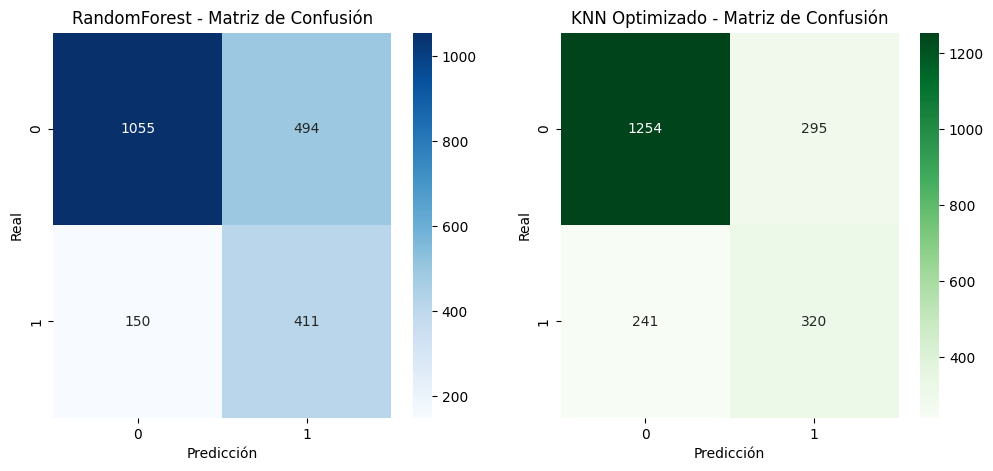

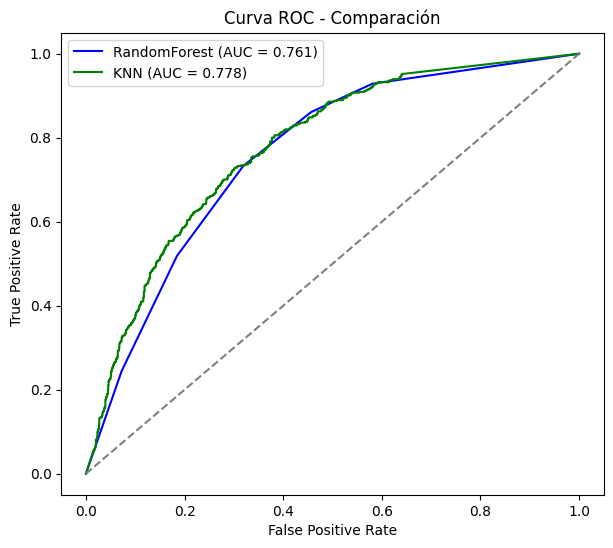

/tmp/ipython-input-3330332621.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="Blues_r")


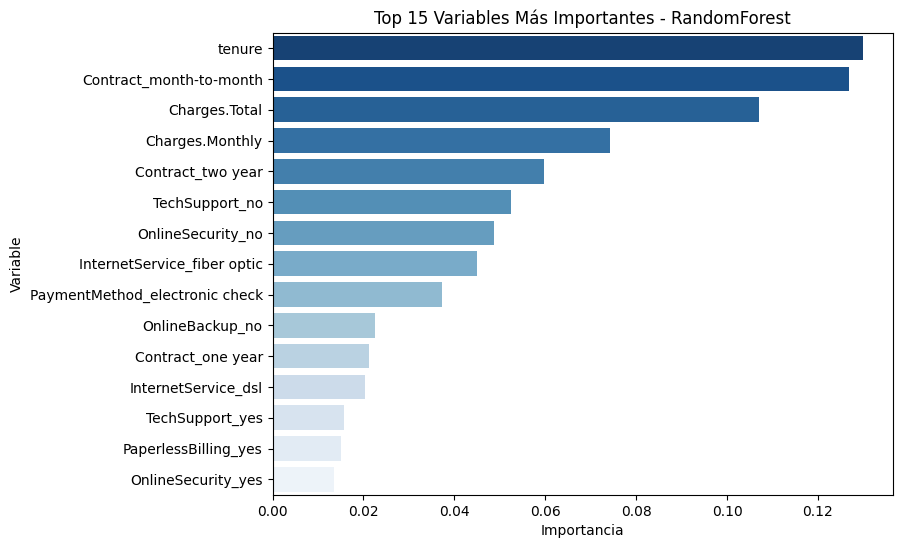

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ---- RandomForest (ya entrenado con GridSearch) ----
y_pred_rf = y_pred
y_prob_rf = y_prob

# ---- KNN (optimizado con GridSearch) ----
y_pred_knn = best_knn.predict(X_test_scaled)
y_prob_knn = best_knn.predict_proba(X_test_scaled)[:, 1]

# ===== 1. MATRICES DE CONFUSIÓN =====
fig, axes = plt.subplots(1, 2, figsize=(12,5))

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_knn = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("RandomForest - Matriz de Confusión")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("KNN Optimizado - Matriz de Confusión")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.show()

# ===== 2. CURVA ROC =====
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, color="blue", label=f"RandomForest (AUC = {roc_auc_rf:.3f})")
plt.plot(fpr_knn, tpr_knn, color="green", label=f"KNN (AUC = {roc_auc_knn:.3f})")
plt.plot([0,1],[0,1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Comparación")
plt.legend()
plt.show()

# ===== 3. FEATURE IMPORTANCE (RandomForest) =====
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="Blues_r")
plt.title("Top 15 Variables Más Importantes - RandomForest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()



#  Informe Comparativo de Modelos de Predicción de Churn

##  Objetivo
Prever qué clientes tienen mayor probabilidad de cancelar sus servicios, con el fin de implementar estrategias de retención y fidelización.

---

## 1. Desempeño de los Modelos

### RandomForest (Optimizado con GridSearch)
- **ROC-AUC = 0.845** → alta capacidad de discriminación.  
- **Recall en churn = 74.7%** → detecta a 3 de cada 4 clientes que realmente cancelan.  
- Buen balance entre precisión y recall, aunque con algunos falsos positivos.  

### KNN (Optimizado con GridSearch, SMOTE y escalado)
- **ROC-AUC = 0.778** → menor capacidad de discriminación.  
- **Recall en churn = 57%** → se le escapan muchos clientes que cancelan.  
- Más balanceado en clientes que permanecen, pero menos útil en la clase de interés (churn).  

**Conclusión:** El modelo con mejor desempeño es **RandomForest**, porque maximiza la detección de clientes en riesgo, incluso sacrificando algo de precisión.

---

## 2. Análisis de Overfitting y Underfitting

### RandomForest
- No presenta señales claras de **overfitting**.  
- Rendimiento en test alto y consistente.  
- El uso de `class_weight="balanced"` y GridSearch evitó que los árboles sobreajustaran.  
- Puede mejorar con ajuste del **threshold de decisión** o con más datos, pero no requiere reducir complejidad.  

### KNN
- Presenta indicios de **underfitting**:  
  - Recall en churn relativamente bajo (57%).  
  - El modelo es demasiado simple para capturar la complejidad de los datos.  
- Aumentar el número de vecinos (`k`) mejoró estabilidad, pero no fue suficiente.  
- Esto era esperable: KNN no escala bien con datasets de **alta dimensionalidad** (muchas variables tras One-Hot Encoding).  

---

## 3. Recomendaciones

- **Modelo principal a usar:**  
  - **RandomForest optimizado**, por su mejor recall y AUC.  

- **Posibles mejoras futuras:**  
  - Ajustar **threshold** para priorizar recall en churn.  
  - Probar modelos de boosting (XGBoost, LightGBM) que suelen superar a RandomForest en datos tabulares.  

---

**Resumen Final:**  
- **RandomForest** → mejor desempeño, sin evidencias de overfitting, ideal para predecir churn.  
- **KNN** → sufre de underfitting debido a la dimensionalidad y complejidad del dataset, por lo que no se recomienda como modelo final.


/tmp/ipython-input-2703153855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="Blues_r")


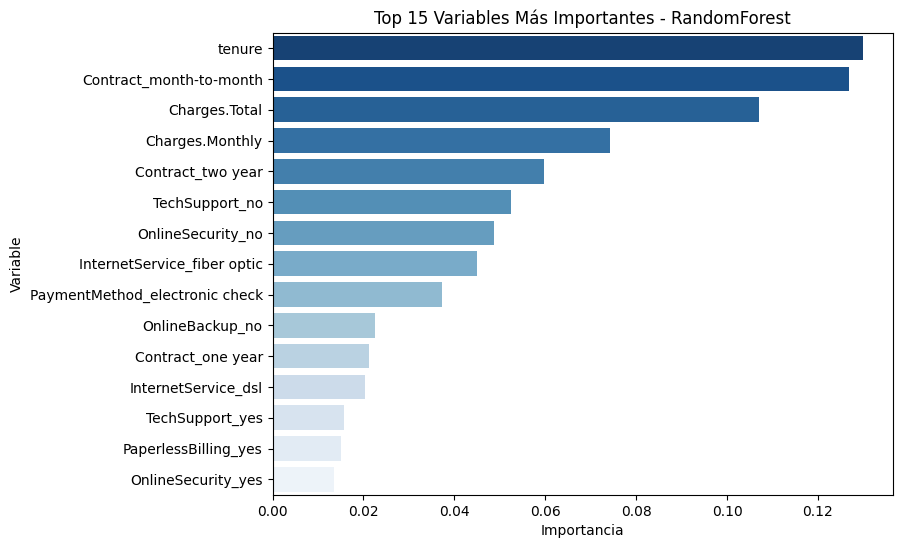

In [317]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importancias
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="Blues_r")
plt.title("Top 15 Variables Más Importantes - RandomForest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

/tmp/ipython-input-3661581697.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=perm_df, palette="Greens_r")


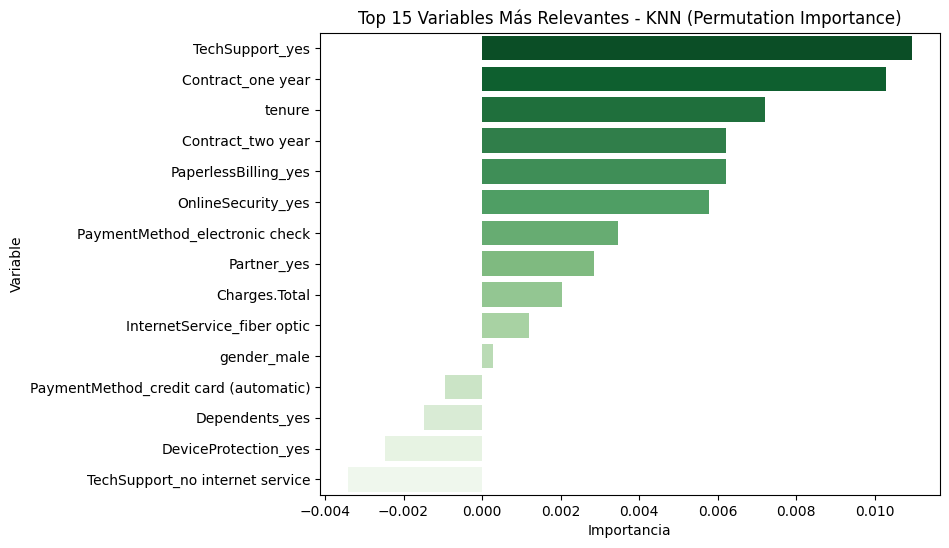

In [320]:
from sklearn.inspection import permutation_importance

# Calculamos la importancia por permutación en el KNN optimizado
perm_importance = permutation_importance(best_knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Convertimos a DataFrame
perm_df = pd.DataFrame({
    "feature": X_lin.columns,
    "importance": perm_importance.importances_mean
}).sort_values(by="importance", ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x="importance", y="feature", data=perm_df, palette="Greens_r")
plt.title("Top 15 Variables Más Relevantes - KNN (Permutation Importance)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

# Informe detallado: Factores de cancelación y estrategias de retención

##  Objetivo
Identificar los **factores que más influyen en la cancelación (churn)** y proponer **acciones de retención** basadas en la evidencia obtenida de los modelos entrenados.

---

##  Modelos y rendimiento (test)
| Modelo                 | ROC‑AUC | Recall Churn (clase=1) | Precision Churn | F1 Churn | Observación clave |
|------------------------|:------:|:-----------------------:|:---------------:|:--------:|-------------------|
| **RandomForest (tuned)** | **0.845** | **0.747** | 0.538 | **0.625** | Mejor capacidad de detección de clientes en riesgo. |
| **KNN (tuned + SMOTE + scaler)** | 0.778 | 0.570 | 0.520 | 0.544 | Menor discriminación; útil como contraste. |

> **Conclusión de desempeño:** RandomForest es el modelo recomendado para **priorizar retención** (mayor AUC y, sobre todo, **mayor recall en churn**).

---

##  Factores que más influyen en la cancelación

**Fuentes de evidencia**  
1) **Importancia de variables** en RandomForest (reducción de impureza).  
2) **Permutation importance** en KNN (pérdida de desempeño al permutar una variable).  
3) **Correlación con Churn** (signo y magnitud observados).

### 1) Tipo de contrato
- **`Contract_month-to-month`**: fuerte **asociación positiva** con churn.  
- **`Contract_two year`**: asociación **negativa** (protege contra el churn).  
**Interpretación:** contratos mes a mes facilitan la salida; mayor permanencia reduce la cancelación.

### 2) Servicios de seguridad/soporte
- **`OnlineSecurity_no`** y **`TechSupport_no`**: **positivos** con churn.  
**Interpretación:** clientes sin seguridad/soporte son más propensos a irse (perciben menor valor o tienen fricciones sin resolver).

### 3) Tipo de Internet
- **`InternetService_fiber optic`**: **positivo** con churn.  
- **`InternetService_no`**: **negativo** (no usa internet, también reduce exposición a problemas percibidos).  
**Interpretación:** en fibra, tarifas/expectativas más altas → mayor sensibilidad si el servicio no cumple.

### 4) Método de pago
- **`PaymentMethod_electronic check`**: **positivo** con churn.  
- Automáticos (`bank transfer`/`credit card`) muestran tendencia **negativa**.  
**Interpretación:** métodos menos automáticos se asocian a mayor fricción y probabilidad de cancelar.

### 5) Precio y antigüedad
- **`Charges.Monthly`** (cargos mensuales): **positivo** con churn.  
- **`tenure`** (antigüedad): **negativo** con churn (factor protector).  
**Interpretación:** cargos altos, sobre todo en clientes nuevos, elevan el riesgo de baja.

### 6) Factores complementarios
- **`PaperlessBilling_yes`**: leve **positivo** (posible proxy de segmento digital/mes-a-mes).  
- **`SeniorCitizen`**: **positivo** moderado (revisar segmentación y necesidades específicas).

> **Coincidencia entre modelos:** las variables anteriores aparecen entre las más relevantes tanto en RandomForest (feature importance) como en KNN (permutation importance), y su signo coincide con la correlación observada.

---

##  Segmentos de **alto riesgo** detectados
1. **Mes a mes** + **cargos mensuales altos** + **baja antigüedad**.  
2. **Sin OnlineSecurity / sin TechSupport** (servicios críticos no contratados).  
3. **Internet: fibra óptica** con tickets altos o incidencias recientes.  
4. **Pago por electronic check** (no automático) y **paperless billing** (segmento digital sensible).  
5. **Clientes nuevos** (tenure bajo), aun con cargos medios.

---

##  Estrategias de retención recomendadas

### A. Contrato y condiciones
- **Upgrade a plazos más largos** (12–24 meses) con **descuento inicial** o beneficios (ej.: meses bonificados, prioridad soporte).  
- **Ofertas “save”** específicas para mes-a-mes al detectar prob. de churn ≥ umbral (p. ej., ≥ 0.6).

### B. Valor percibido (seguridad/soporte)
- **Bundles** con **OnlineSecurity** y **TechSupport** con precio promocional para clientes de alto riesgo.  
- **Onboarding guiado** y **resolución proactiva de tickets** para quienes no tienen soporte/seguridad.

### C. Precio y facturación
- **Ajustes temporales** en **`Charges.Monthly`** para clientes nuevos de alto valor (rebajas escalonadas 3–6 meses).  
- Migración de **`electronic check` → pagos automáticos** (bank transfer/credit card) con incentivo (descuento o puntos).  
- **Alertas proactivas** de consumo y facturación para evitar “sorpresas” de cobro.

### D. Experiencia por tipo de Internet
- **Fibra óptica**: monitoreo de SLA y **compensaciones** ante incidencias; mensajes de valor (velocidad/estabilidad) y pruebas de rendimiento.  
- **Campañas de educación** (uso de router, colocación, redes mesh) para reducir frustración técnica.

### E. Antigüedad (tenure)
- **Programa de fidelidad** por tramos (6, 12, 24 meses) con recompensas.  
- **Intervención temprana (0–3 meses):** check‑ins, tutoriales, llamadas de calidad.

---

##  Operativización con el modelo

1. **Scoring semanal** con RandomForest: probabilidad de churn por cliente.  
2. **Estrategia por umbrales** (ejemplo):  
   - **≥ 0.70 (Muy alto)**: oferta de retención inmediata + upgrade de plan + contacto humano.  
   - **0.50–0.70 (Alto)**: bundle seguridad/soporte + ajuste temporal de precio + migración a pago automático.  
   - **0.30–0.50 (Medio)**: email educacional, optimización de Wi‑Fi, recordatorio de beneficios.  
3. **Medición de impacto**: tasa de churn, NPS, ARPU, uptake de ofertas, **uplift** por tratamiento vs control (A/B).

---

##  Próximos pasos
- **Ajuste de umbral de decisión** para maximizar recall con coste controlado de falsos positivos.  
- **Prueba de modelos de boosting** (XGBoost/LightGBM) para mejorar AUC/recall.  
- **Feature engineering** adicional: gasto medio (`Total/tenure`), variabilidad de consumo, historial de incidencias, interacciones entre servicios.  
- **Cohortes** por “tenure × pricing × contrato” para personalizar ofertas.  
- **Monitoreo de deriva** (data/model drift) y re‑entrenamiento trimestral.

---

##  Resumen ejecutivo
- **RandomForest** es el mejor modelo para **detectar clientes en riesgo** (AUC 0.845; recall 0.747).  
- Los factores críticos de churn son: **contrato mes-a-mes, ausencia de seguridad/soporte, fibra óptica, método de pago “electronic check”, cargos mensuales altos y baja antigüedad**.  
- Las **acciones de retención** deben centrar incentivos en **migrar a contratos más largos**, **agregar seguridad/soporte**, **reducir fricciones de facturación** (pagos automáticos) y **acompañar a clientes nuevos** con precios y soporte proactivo.

